<a href="https://colab.research.google.com/github/Wernelove/dados_ecobin/blob/main/dados_ecobin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving ecobin.csv to ecobin.csv


In [ ]:
dataset = pd.read_csv('ecobin.csv', error_bad_lines=False)
dataset.head(15)

<ipython-input-3-084c90933623>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataset = pd.read_csv('ecobin.csv', error_bad_lines=False)
Skipping line 251: expected 9 fields, saw 10
Skipping line 281: expected 9 fields, saw 10



,Id,Condominio,Cidade,Estado,Numero_Apartamentos,Populacao,Residuos_Anuais,Residuos_Diarios,Residuos_Reciclados
0,1,Condomínio A,São Paulo,SP,100.0,300.0,113760.0,0.31,2387.0
1,2,Condomínio B,Rio de Janeiro,RJ,50.0,150.0,56880.0,0.16,1194.0
2,3,Condomínio C,Belo Horizonte,MG,200.0,600.0,227520.0,0.62,4779.0
3,4,Condomínio D,Porto Alegre,RS,75.0,225.0,85320.0,0.23,1794.0
4,5,Condomínio E,Brasília,DF,120.0,360.0,136512.0,0.37,2861.0
5,6,Condomínio F,Curitiba,PR,90.0,270.0,102384.0,0.28,2150.0
6,7,Condomínio G,Salvador,BA,80.0,240.0,91008.0,0.25,1911.0
7,8,Condomínio H,Recife,PE,150.0,450.0,170640.0,0.47,3583.0
8,9,Condomínio I,Florianópolis,SC,110.0,330.0,124992.0,0.34,2616.0
9,10,Condomínio J,Porto Velho,RO,70.0,210.0,79608.0,0.22,1669.0


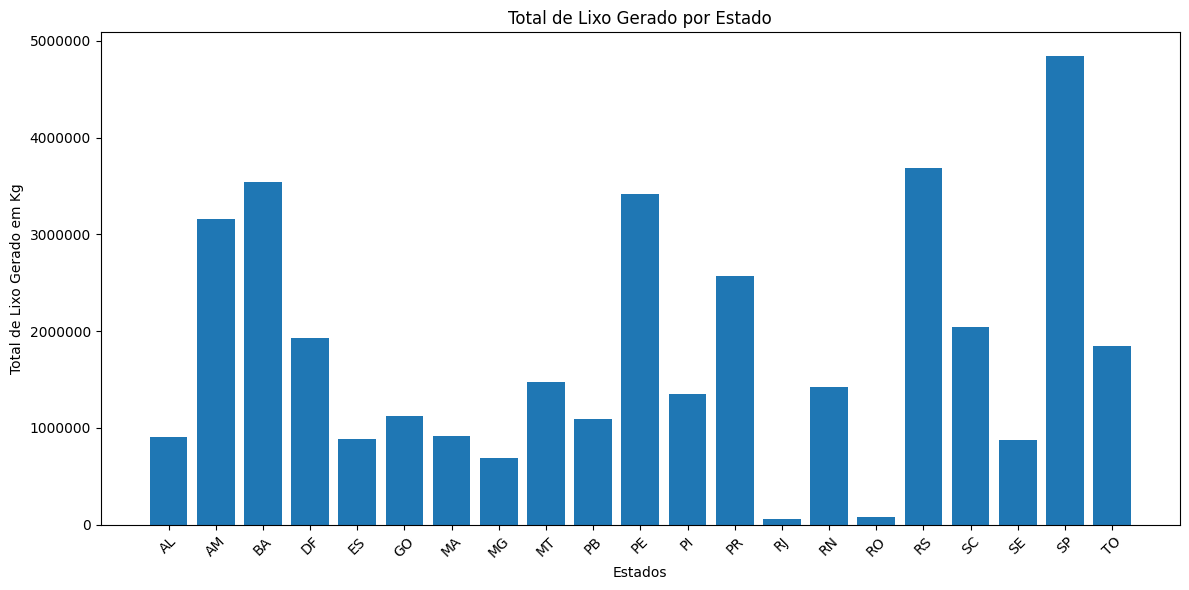

In [ ]:
dataset = dataset.dropna()

lixo_estado = dataset.groupby('Estado')['Residuos_Anuais'].sum()

dataset['Residuos_Anuais'] = pd.to_numeric(dataset['Residuos_Anuais'], errors='coerce')

lixo_estado = dataset.groupby('Estado')['Residuos_Anuais'].sum()
lixo_estado = lixo_estado.reset_index()

plt.figure(figsize=(12, 6))
plt.bar(lixo_estado['Estado'], lixo_estado['Residuos_Anuais'])
plt.title('Total de Lixo Gerado por Estado')
plt.xlabel('Estados')
plt.ylabel('Total de Lixo Gerado em Kg')
plt.xticks(rotation=45)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.tight_layout()
plt.show()

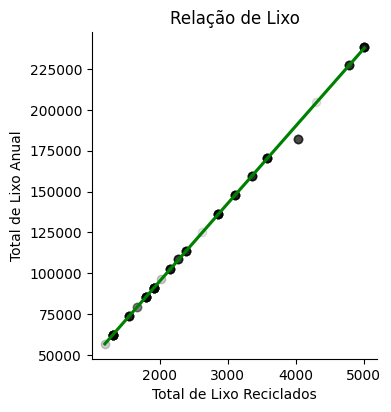

In [ ]:
sns.lmplot(x='Residuos_Reciclados', y="Residuos_Anuais", data=dataset, line_kws={'color': 'green'}, lowess=True, height=4, aspect=1.0, scatter_kws = {"color": "black", "alpha": 0.1})
plt.xlabel('Total de Lixo Reciclados'), plt.ylabel('Total de Lixo Anual'), plt.title('Relação de Lixo')
plt.show()

O gráfico de dispersão representa a relação entre as variáveis "Total de Lixo Reciclados" e "Total de Lixo Anual". A linha de regressão mostra a tendência geral da relação, indicando se as variáveis aumentam ou diminuem juntas. O gráfico ajuda a identificar possíveis padrões ou tendências nos dados. No entanto, é necessário analisar os pontos de dados específicos e considerar o contexto para obter conclusões mais precisas.


In [ ]:
print("Media de lixo gerado por todos os estados do Brasil: {0:.2f}kg".format(dataset['Residuos_Anuais'].mean()))

print("Mediana de lixo gerado por todos os estados do Brasil: {0:.2f}kg".format(dataset['Residuos_Anuais'].median()))

print("Desvio padrão lixo gerado por todos os estados do Brasil : {0:.2f}kg".format(dataset['Residuos_Anuais'].std()))


NameError: ignored

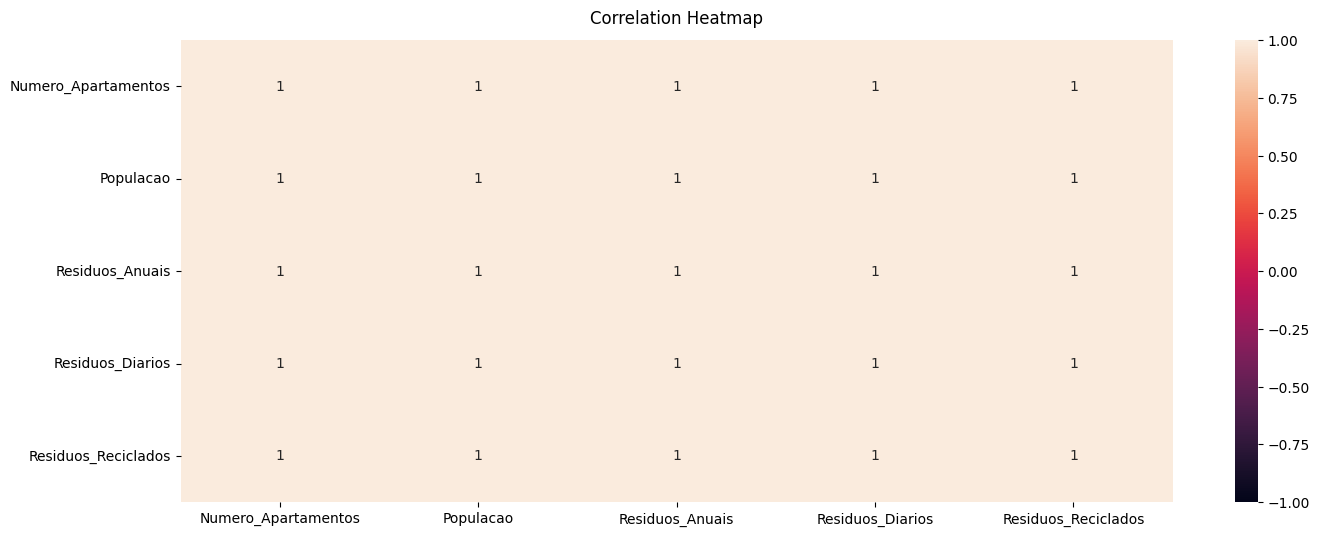

In [ ]:
plt.figure(figsize=(16, 6))
dataset_sp = dataset[(dataset['Estado'].str.startswith('SP'))]
dados_numericos = dataset[['Numero_Apartamentos',	'Populacao',	'Residuos_Anuais', 'Residuos_Diarios', 'Residuos_Reciclados']]
heatmap = sns.heatmap(dados_numericos.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

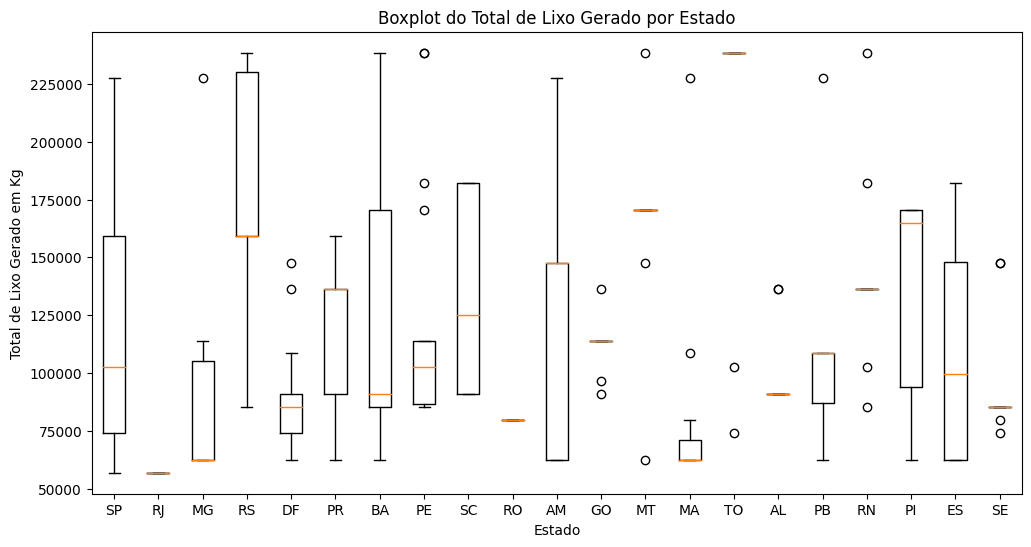

In [ ]:
data = [dataset[dataset['Estado'] == state]['Residuos_Anuais'].dropna() for state in dataset['Estado'].unique()]

plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=dataset['Estado'].unique())
plt.title("Boxplot do Total de Lixo Gerado por Estado")
plt.xlabel("Estado")
plt.ylabel("Total de Lixo Gerado em Kg")
plt.show()

## GRÁFICO DE DISPERSÃO

In [ ]:
dataset['Taxa_Reciclagem'] = (dataset['Residuos_Reciclados'] / dataset['Residuos_Anuais']) * 100

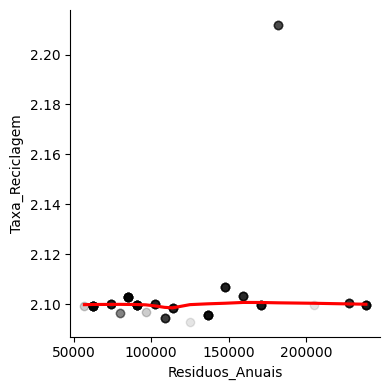

In [ ]:
sns.lmplot(x='Residuos_Anuais', y="Taxa_Reciclagem",
           data=dataset, line_kws={'color': 'red'}, lowess=True, height=4, aspect=1.0, scatter_kws = {"color": "black", "alpha": 0.1})

##POLINOMIAL QUADRÁTICA

(305, 1) (305, 1)


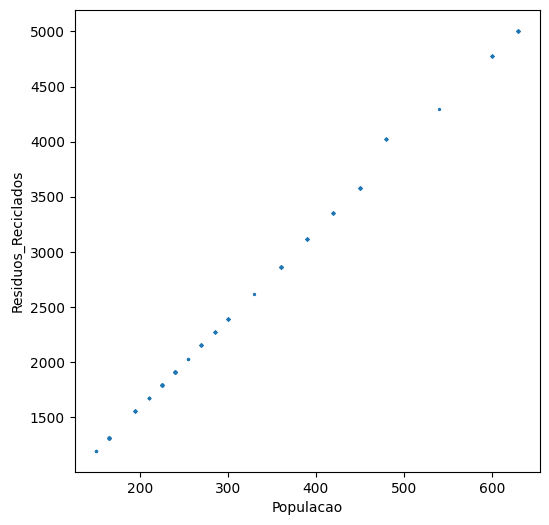

In [ ]:
x = dataset['Populacao'].values.reshape(-1, 1)
y = dataset['Residuos_Reciclados'].values.reshape(-1, 1)

print(x.shape, y.shape)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.xlabel('Populacao')
plt.ylabel('Residuos_Reciclados')

plt.show()

In [ ]:
class PolynomialRegression():
    def __init__(self, degree=2):
        self.degree = degree
        self.b = None

    def fit(self, x, y):
        powers = self.__compute_powers(x)

        b1 = np.linalg.inv(np.dot(powers.T, powers))
        b2 = np.dot(powers.T, y)
        self.b = np.dot(b1, b2)

    def predict(self, x):
        powers = self.__compute_powers(x)
        return np.dot(powers, self.b)

    def __compute_powers(self, x):
        x = x.ravel()
        powers = np.empty((x.shape[0], self.degree + 1))
        powers[:, 0] = np.ones(x.shape[0])
        powers[:, 1] = x

        for p in range(2, self.degree+1):
            powers[:, p] = x**p
        return powers

In [ ]:
reg = PolynomialRegression()
reg.fit(x, y)

print(reg.b)

[[-5.55807312e+01]
 [ 8.29529698e+00]
 [-3.65568995e-04]]


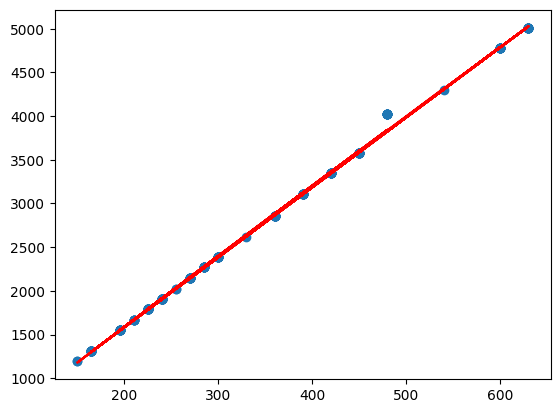

In [ ]:
y_pred = reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# **Regressão Linear**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dataset[['Populacao', 'Residuos_Diarios', 'Residuos_Reciclados']]  # Escolha as colunas relevantes para X
y = dataset['Residuos_Anuais']  # Escolha a coluna da variável dependente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Escolha a proporção desejada

regressor = LinearRegression()
regressor.fit(X_train, y_train)

score = regressor.score(X_test, y_test)
print('Coeficiente de determinação (R²):', score)

# Exemplo de previsão para novos dados
novos_dados = [[400, 0.4, 3000]]  # Valores de exemplo para População, Resíduos Diários e Resíduos Reciclados
previsao = regressor.predict(novos_dados)
print('Previsão:', previsao)


Coeficiente de determinação (R²): 0.9999942011143701
Previsão: [151235.922006]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#**Regressão Polinomial**

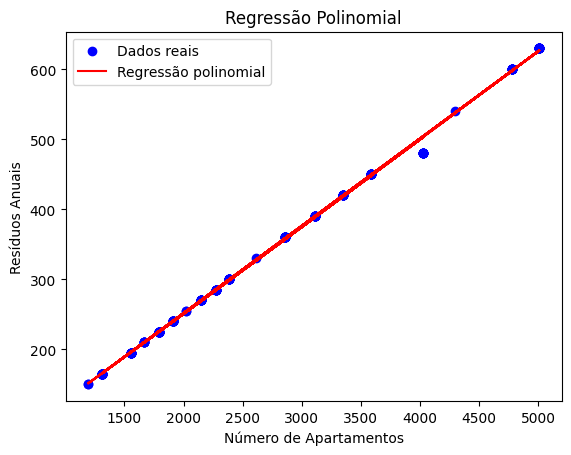

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = dataset['Residuos_Reciclados'].values.reshape(-1, 1)
y = dataset['Populacao'].values

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', label='Regressão polinomial')
plt.xlabel('Número de Apartamentos')
plt.ylabel('Resíduos Anuais')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()
